<a href="https://colab.research.google.com/github/fsoria/Data-Science-I/blob/main/ProyectoDS_ParteII_Soria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Presentacion del proyecto**

**Modelo para predecir el impacto de campañas de marketing**

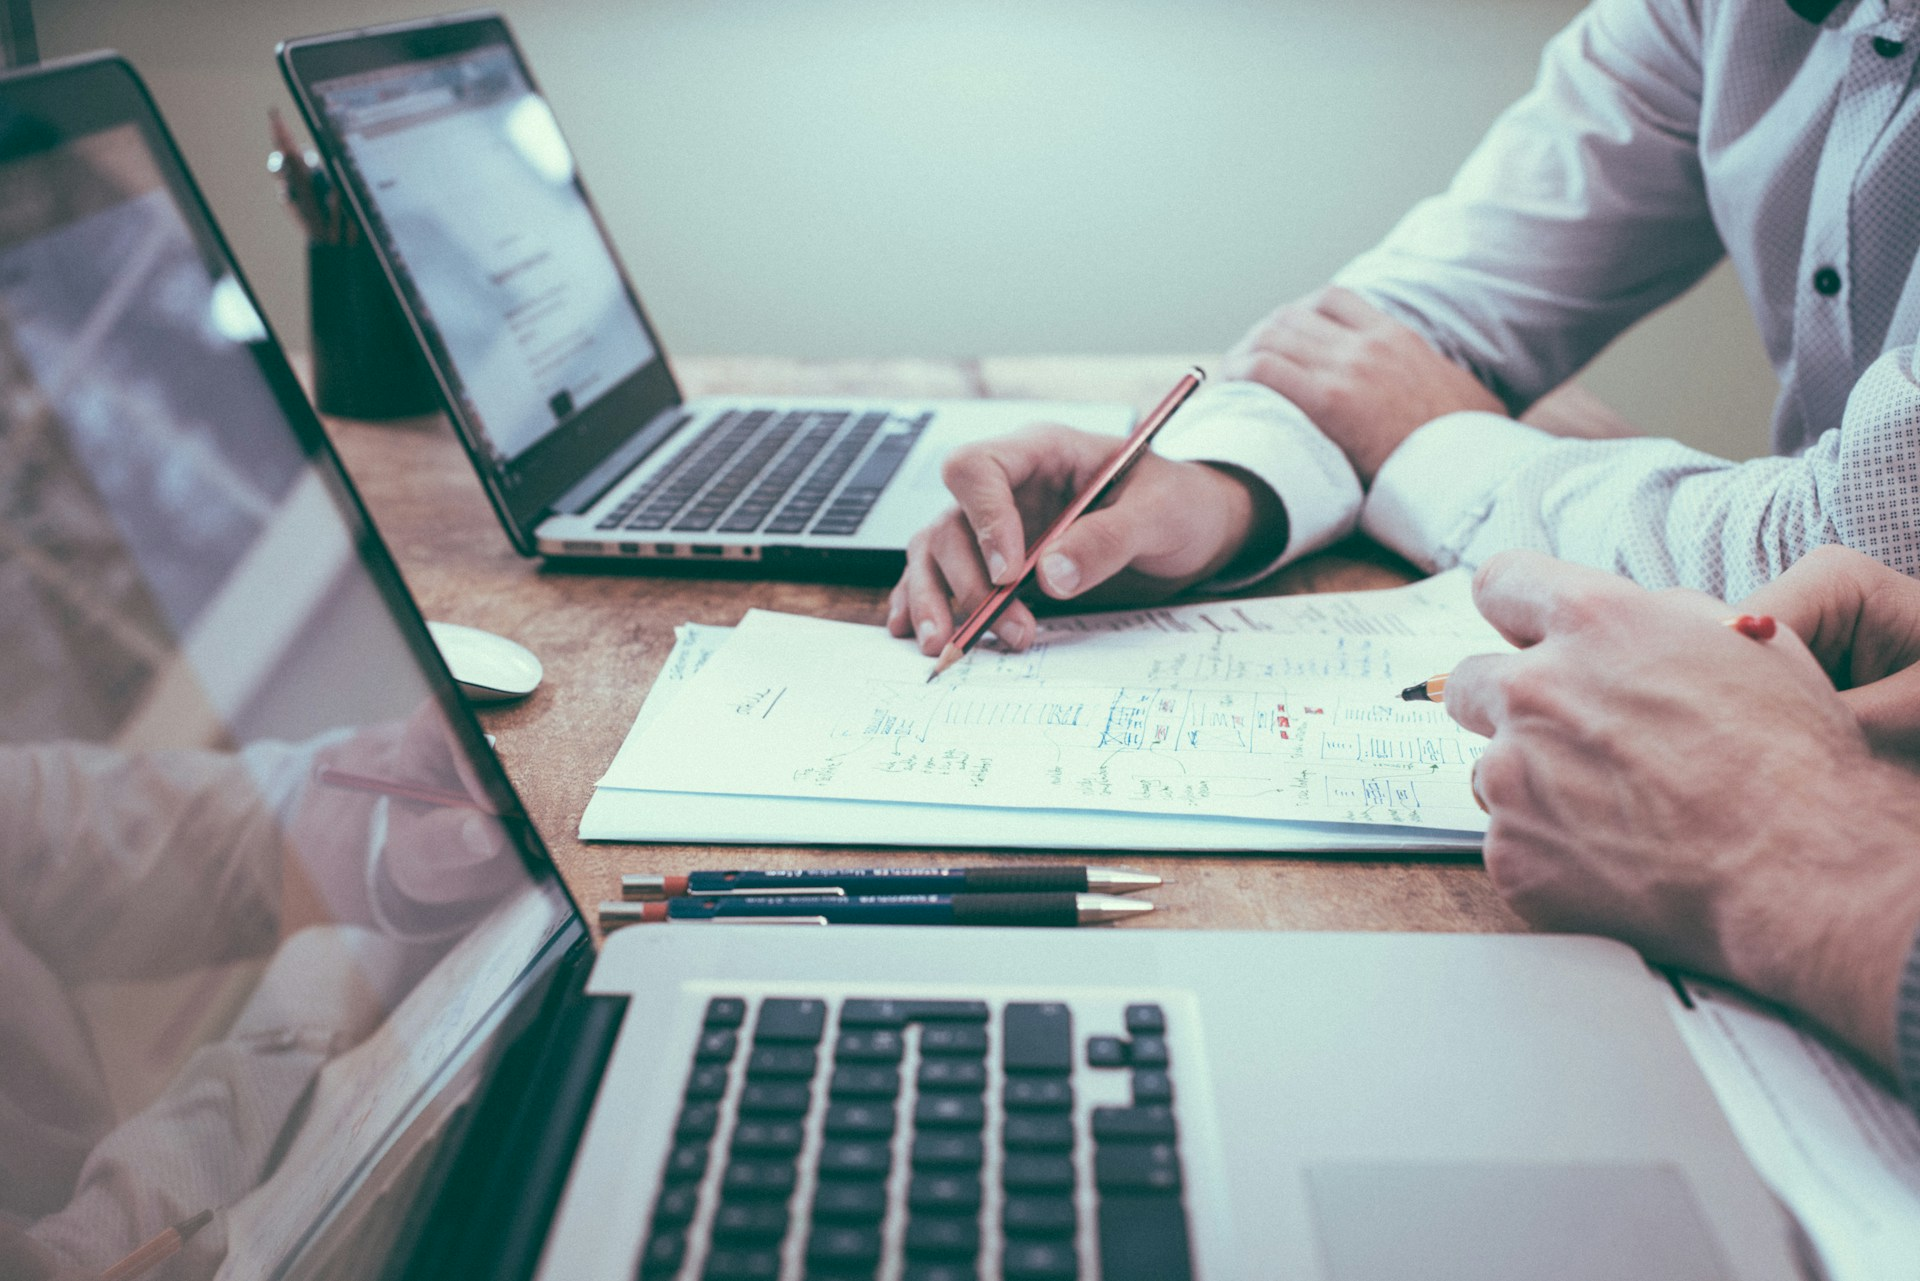

**Contexto del analisis**

Las campañas de marketing desempeñan un papel importante en la estrategia comercial de las empresas, buscando influir en el comportamiento de los clientes y en consecuencia, aumentar las ventas.
Sin embargo no todas las campañas logran el impacto deseado. La efectividad puede variar significativamente dependiendo de varios factores como las características demográficas y el comportamiento previo de los clientes. Este conjunto de datos se utiliza para analizar la respuesta de los clientes a cinco campañas de marketing diferentes evaluando si estas campañas tienen un impacto significativo en el monto total de las compras realizadas por los clientes.

La motivación de este proyecto surge de la necesidad de comprender mejor qué factores contribuyen al éxito de una campaña de marketing.

La audiencia de este proyecto incluye a profesionales de marketing, analistas de datos y gerentes de empresas que buscan maximizar el impacto de sus campañas de marketing. Además este análisis puede ser de interés para investigadores que estudian el comportamiento del consumidor y la efectividad de las estrategias de marketing.
El dataset seleccionado proviene de una campaña de marketing y contiene datos de 2240 clientes. A partir de la informacion incluida en el dataset se puede analizar los patrones de compra de los clientes, su respuesta a campañas de marketing y otras características demográficas y de comportamiento. La finalidad de este análisis es identificar factores que influyan en el éxito de las campañas de marketing y entender mejor el comportamiento del cliente.




**Fuente**

https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign/data

**Contexto Comercial y Analítico**

En el contexto empresarial es fundamental entender la efectividad de las campañas de marketing para asegurar un uso eficiente de los recursos. Este análisis plantea la pregunta de si las campañas de marketing realmente influyen en el comportamiento de compra de los clientes y en qué medida lo hacen. La respuesta influye directamente en la estrategia de marketing de una empresa y su capacidad para alcanzar sus objetivos de ventas.


**Pregunta de investigacion**

Las campañas de marketing tienen un impacto significativo en el monto total de las compras de los clientes?


**Hipotesis nula**
Las campañas de marketing no tienen un impacto en el monto total de las compras de los clientes.

**Hipotesis alternativa**
Las campañas de marketing tienen un impacto significativo en el monto total de las compras de los clientes.

**Objetivo**

El objetivo principal de este proyecto es evaluar la efectividad de las campañas de marketing con respecto al impacto que tienen en el comportamiento de compra de los clientes. Se pretende identificar las campañas que generan un incremento significativo en las compras, así como las características de los clientes que son más susceptibles de ser influenciados por dichas campañas.

#**Lectura de datos**


**Librerias necesarias para el analisis de datos**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.style.use("bmh")
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

**Configuración del entorno de Python en Google Colab**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
%cd drive/MyDrive/Data Science I/
%ls

Mounted at /content/drive
/content/drive/MyDrive/Data Science I
marketing_campaign.csv  ProyectoDS_ParteI_Soria.ipynb


**Lectura del dataset**

In [ ]:
marketing = pd.read_csv("marketing_campaign.csv", sep='\t', engine='python')

**Análisis inicial del dataset**

In [ ]:
marketing.shape

(2240, 29)

In [ ]:
marketing.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
marketing.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1780,5150,1979,Basic,Single,20194.0,1,0,17-12-2012,64,0,...,6,0,0,0,0,0,0,3,11,0
753,3667,1969,Graduation,Married,80952.0,0,0,28-02-2013,20,778,...,8,0,1,1,1,0,0,3,11,1
587,5057,1961,Master,Married,61794.0,0,1,14-09-2013,74,264,...,2,0,0,0,0,0,0,3,11,0
1667,7327,1959,PhD,Married,36732.0,1,1,29-12-2013,71,21,...,2,0,0,0,0,0,0,3,11,0
1112,10022,1973,PhD,Single,54466.0,1,1,09-02-2014,78,12,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
marketing.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [ ]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
marketing.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

**Descripcion de variables**

**Education**: nivel de educación del cliente.

**Marital**: estado civil del cliente

**Income**: ingresos anuales del hogar del cliente

**Kidhome**: número de niños pequeños en el hogar del cliente

**Teenhome**: número de adolescentes en el hogar del cliente

**DtCustomer**: fecha de inscripción del cliente en la empresa

**Recency**: número de días desde la última compra.

**MntWines**: cantidad gastada en productos vitivinícolas en los últimos 2 años

**MntFruits**: cantidad gastada en productos de frutas en los últimos 2 años

**MntMeatProducts**: cantidad gastada en productos cárnicos en los últimos 2 años

**MntFishProducts**: cantidad gastada en productos pesqueros en los últimos 2 años

**MntSweetProducts**: cantidad gastada en productos dulces en los últimos 2 años

**MntGoldProds**: cantidad gastada en productos de oro en los últimos 2 años

**NumDealsPurchases**: número de compras realizadas con descuento

**NumWebPurchases**: número de compras realizadas a través del sitio web de la empresa

**NumCatalogPurchases**: número de compras realizadas mediante el catálogo

**NumStorePurchases**: número de compras realizadas directamente en las tiendas

**NumWebVisitsMonth**: número de visitas al sitio web de la empresa en el último mes

**AcceptedCmp1**: 1 si el cliente aceptó la oferta en la primera campaña; 0 en caso contrario.

**AcceptedCmp2**: 1 si el cliente aceptó la oferta en la segunda campaña, 0 en caso contrario.

**AcceptedCmp3**: 1 si el cliente aceptó la oferta en la tercera campaña, 0 en caso contrario.

**AcceptedCmp4**: 1 si el cliente aceptó la oferta en la cuarta campaña, 0 en caso contrario.

**AcceptedCmp5**: 1 si el cliente aceptó la oferta en la quinta campaña, 0 en caso contrario.

**Complain**: 1 si el cliente se quejó en los últimos 2 años

**Response (target)**: 1 si el cliente aceptó la oferta en la última campaña; 0 en caso contrario.


In [ ]:
marketing.dtypes.value_counts()

,count
int64,25
object,3
float64,1


In [ ]:
marketing.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [ ]:
marketing.describe(include="object").T

,count,unique,top,freq
Education,2240,5,Graduation,1127
Marital_Status,2240,8,Married,864
Dt_Customer,2240,663,31-08-2012,12


#**Limpieza y transformacion de datos**

**Valores duplicados**

In [ ]:
marketing.duplicated().sum()

0

**Valores nulos**

In [ ]:
marketing.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
# Cambio en columna Dt_Customer a tipo datetime y en columna Income se agregan datos vacios con la media.

marketing["Dt_Customer"] = pd.to_datetime(marketing["Dt_Customer"], format='%d-%m-%Y', dayfirst=True)
marketing["Income"].fillna(marketing["Income"].mean(), inplace=True)
marketing['Year'] = marketing['Dt_Customer'].dt.year
marketing['Month'] = marketing['Dt_Customer'].dt.month
marketing['Day'] = marketing['Dt_Customer'].dt.day
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

**Valores outliers**

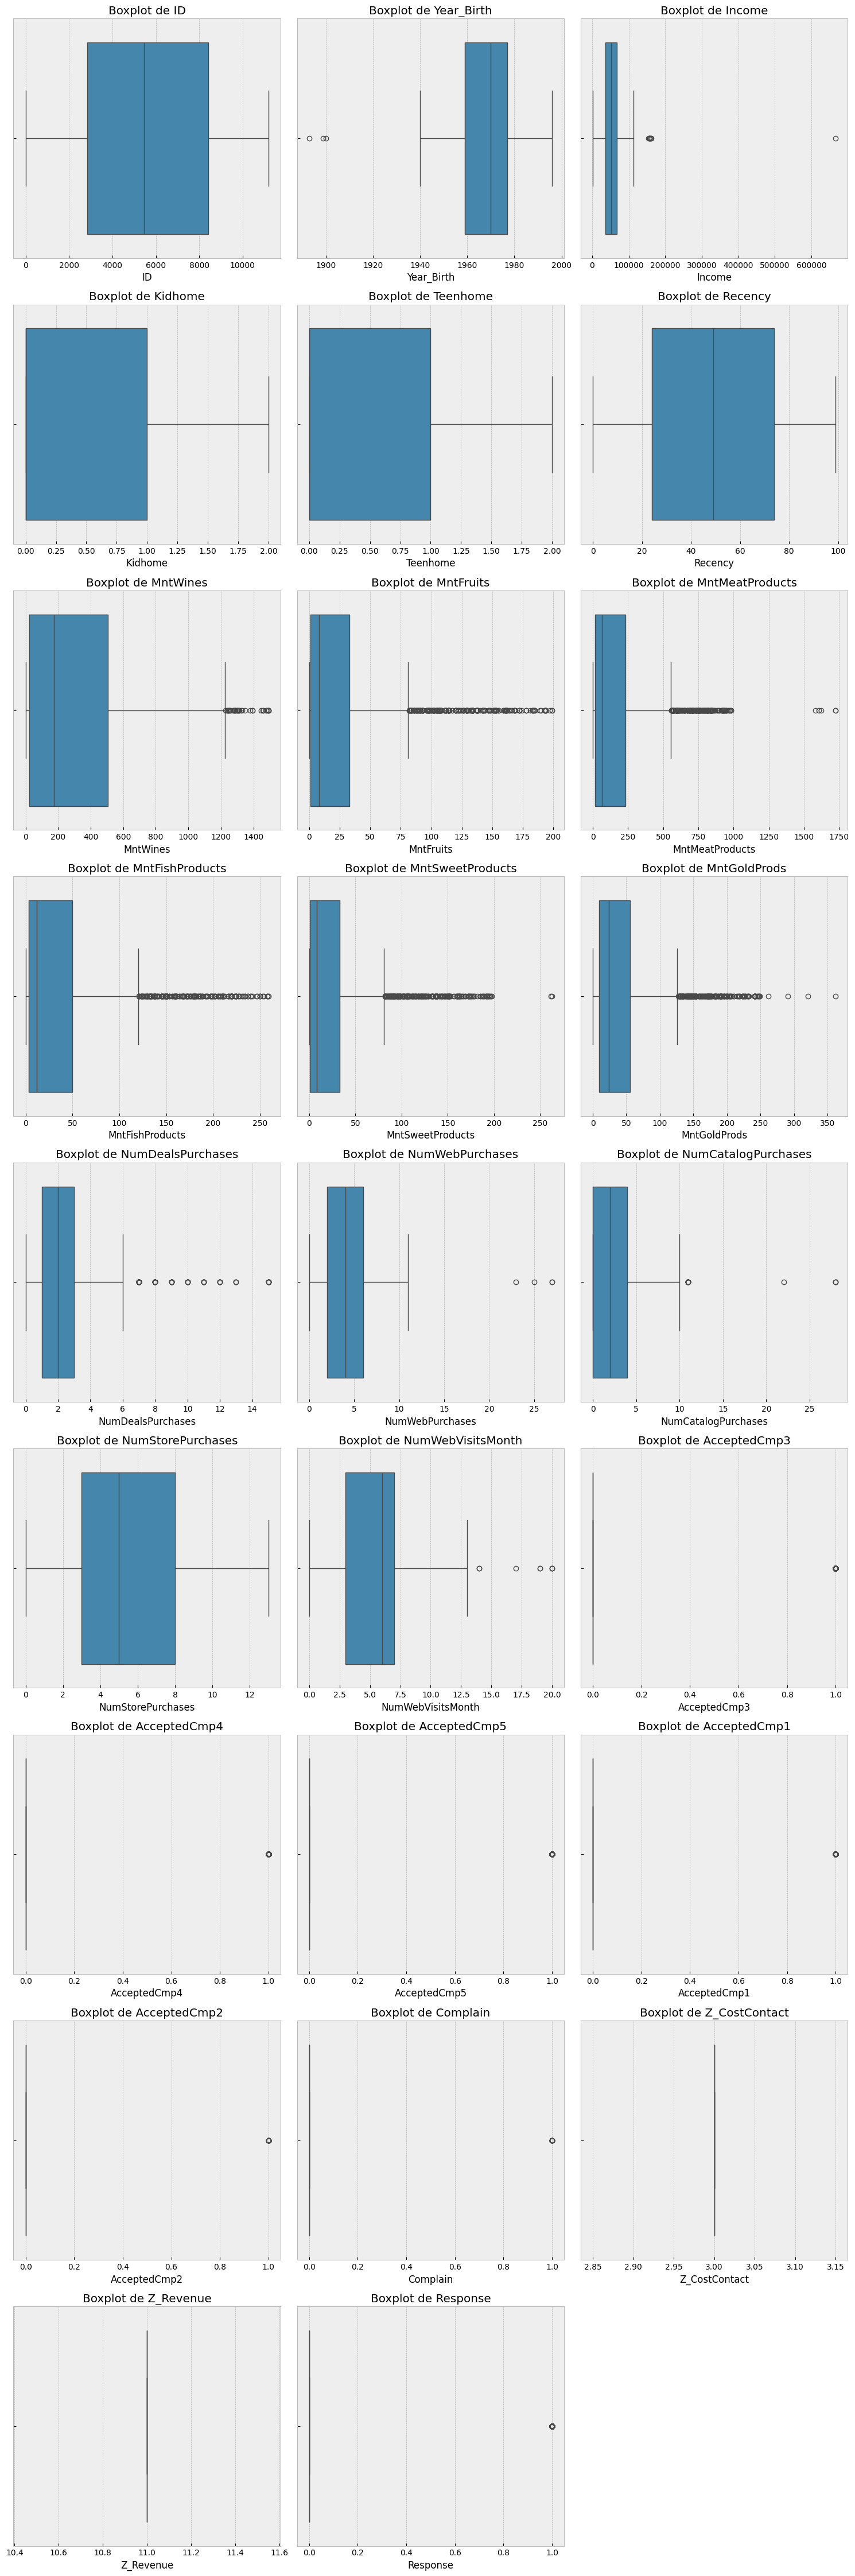

In [ ]:
numeric_columns = marketing.select_dtypes(include=['int64', 'float64'])

# Calcular el número de filas y columnas para los subgráficos
num_vars = len(numeric_columns.columns)
num_rows = (num_vars // 3) + (1 if num_vars % 3 > 0 else 0)
num_cols = min(num_vars, 3)

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 5*num_rows))

# Generar y mostrar los diagramas de caja para cada variable numérica
for i, col in enumerate(numeric_columns.columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(x=marketing[col])
    plt.title("Boxplot de {}".format(col))
    plt.tight_layout()

plt.show()

In [ ]:
# Se rastrea ubicacion de dato no representativo con la muestra observado por la funcion describe en el numero maximo

marketing.loc[marketing['Income'] >= 666666, 'ID']

,ID
2233,9432


In [ ]:
# Se elimina dato no representativo con la muestra

marketing = marketing[marketing['ID'] != 9432]

In [ ]:
marketing.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year,Month,Day
count,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239,2239.000000,2239.000000,2239.000000,2239.000000,...,2239.000000,2239.000000,2239.000000,2239.000000,2239.0,2239.0,2239.000000,2239.000000,2239.000000,2239.000000
mean,5590.444841,1968.802144,51972.834762,0.443948,0.506476,2013-07-10 10:26:25.350603008,49.121036,304.067441,26.307727,167.016525,...,0.072800,0.064314,0.013399,0.009379,3.0,11.0,0.149174,2013.028138,6.467619,15.644484
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2012.000000,1.000000,1.000000
25%,2827.500000,1959.000000,35533.500000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,1.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013.000000,3.000000,8.000000
50%,5455.000000,1970.000000,51717.000000,0.000000,0.000000,2013-07-09 00:00:00,49.000000,174.000000,8.000000,67.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013.000000,6.000000,16.000000
75%,8423.500000,1977.000000,68277.500000,1.000000,1.000000,2013-12-30 12:00:00,74.000000,504.500000,33.000000,232.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013.000000,10.000000,23.000000
max,11191.000000,1996.000000,162397.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,2014.000000,12.000000,31.000000
std,3246.372471,11.985494,21410.605416,0.538390,0.544555,NaN,28.963662,336.614830,39.781468,225.743829,...,0.259867,0.245367,0.115001,0.096412,0.0,0.0,0.356339,0.684707,3.487460,8.787914


In [ ]:
# Se crea columna sobre el total de las ventas por cliente

total_purchase= ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
marketing['TotalPurchases'] = marketing[total_purchase].sum(axis=1)
(marketing[['ID', 'TotalPurchases']].head())


<ipython-input-20-7eb8825b9710>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing['TotalPurchases'] = marketing[total_purchase].sum(axis=1)


,ID,TotalPurchases
0,5524,1617
1,2174,27
2,4141,776
3,6182,53
4,5324,422


#**Análisis Exploratorio de datos**

**Analisis univariado**

Grafico de torta o Pie Chart  - Aceptacion de campañas de marketing por cliente

El siguiente grafico muestra la proporción de clientes que aceptaron cada una de las cinco campañas de marketing

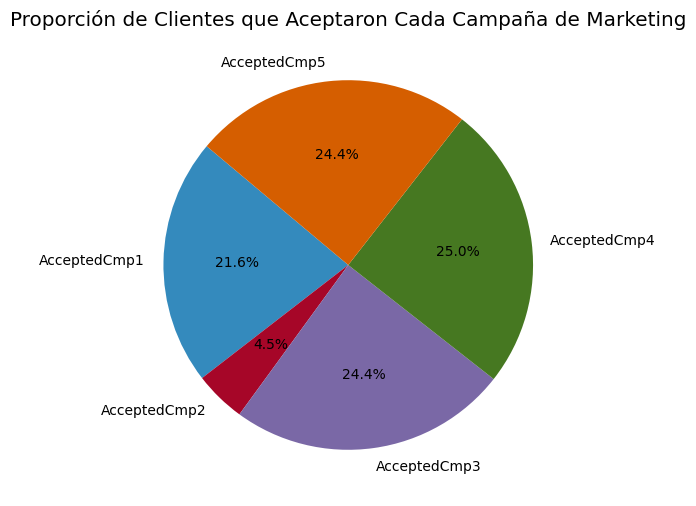

In [ ]:
campaigns_counts = marketing[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum()

plt.figure(figsize=(8, 6))
plt.pie(campaigns_counts, labels=campaigns_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de Clientes que Aceptaron Cada Campaña de Marketing')
plt.show()

Histograma - Compras totales por cliente

El siguiente gráfico muestra la distribución de las compras realizadas por los clientes en los ultimos dos años

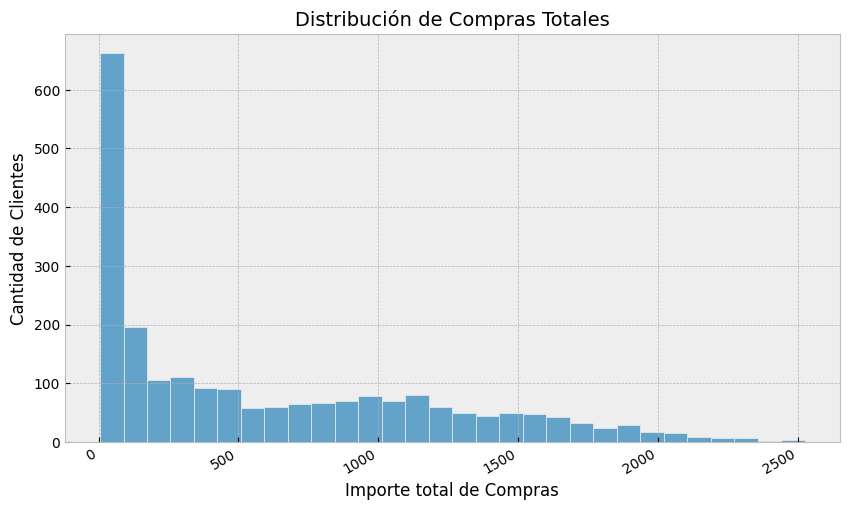

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(marketing['TotalPurchases'], bins=30)
plt.gcf().autofmt_xdate()
plt.title('Distribución de Compras Totales', fontsize=14)
plt.xlabel('Importe total de Compras', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Grafico de densidad - Ingresos por cliente

El siguiente gráfico muestra la distribución de densidad de los ingresos de los clientes

<ipython-input-23-a71fe488c4b2>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(marketing['Income'], shade=True, color="blue")


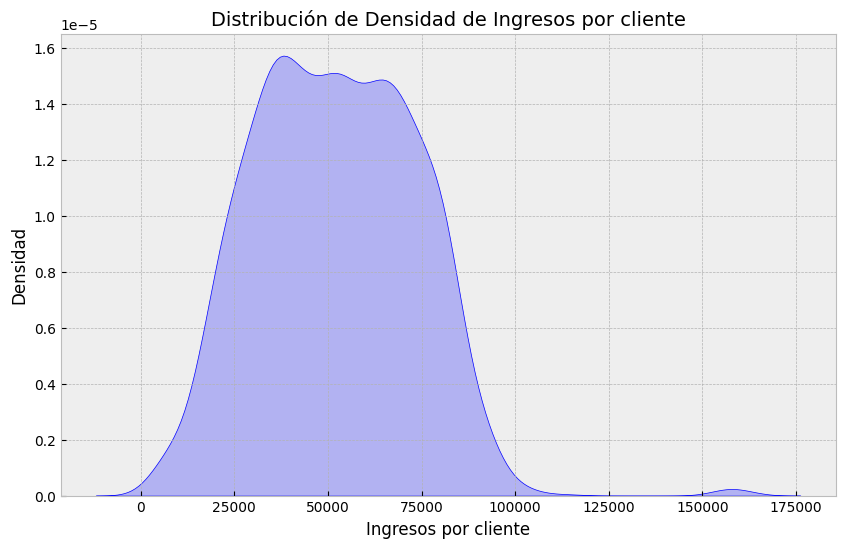

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(marketing['Income'], shade=True, color="blue")
plt.title('Distribución de Densidad de Ingresos por cliente', fontsize=14)
plt.xlabel('Ingresos por cliente', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Grafico de barras - Compras por categoria

Este gráfico muestra el total de compras por cliente por categoría a través de los diferentes años.

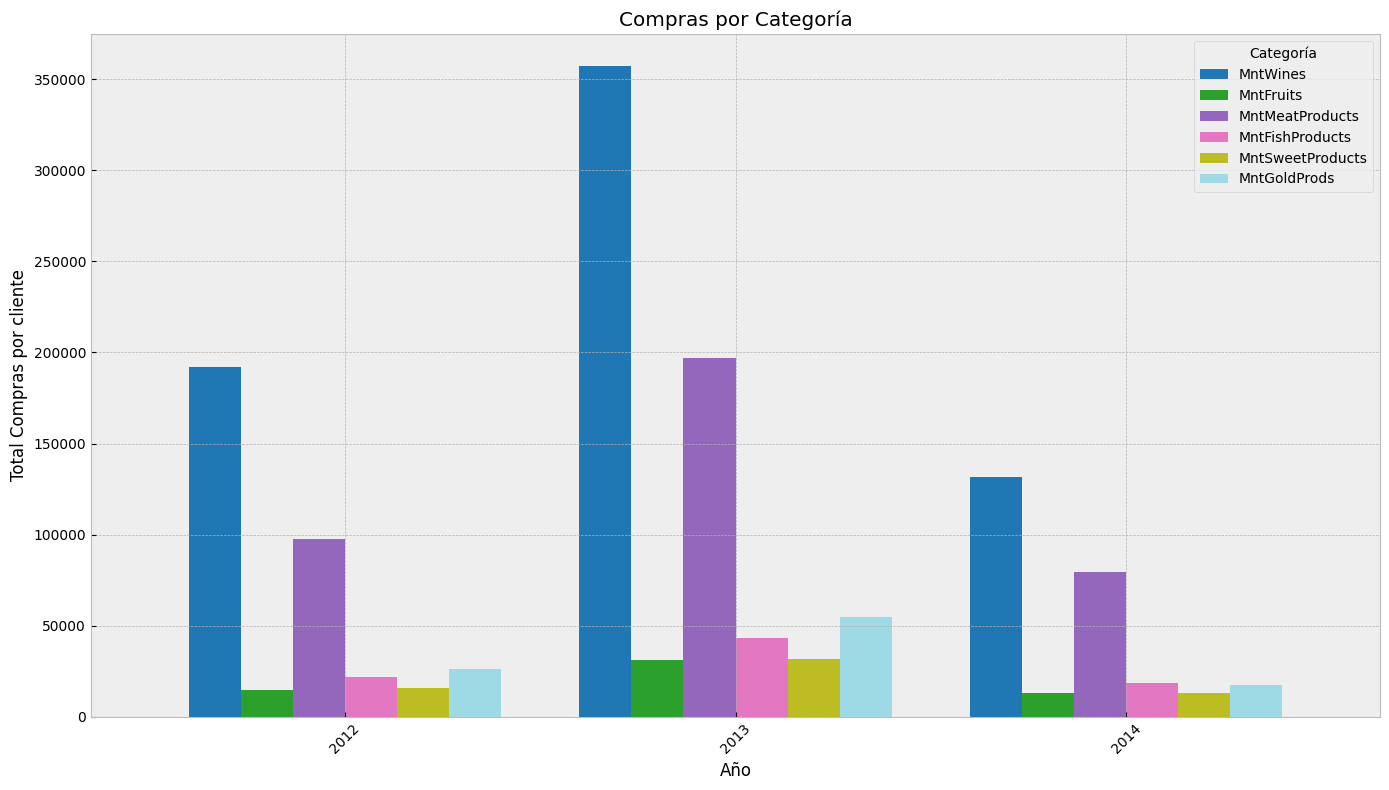

In [ ]:
marketing['Year'] = pd.DatetimeIndex(marketing['Dt_Customer']).year


category_purchases = marketing.groupby('Year')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

plt.figure(figsize=(14, 8))

category_purchases.plot(kind='bar', width=0.8, colormap='tab20', ax=plt.gca())

plt.title('Compras por Categoría')
plt.xlabel('Año')
plt.ylabel('Total Compras por cliente')
plt.xticks(rotation=45)
plt.legend(title='Categoría')
plt.tight_layout()
plt.show()

**Analisis bivariado**

Diagrama de caja y bigotes o boxplot - Compras por cliente segun aceptacion de campaña de marketing

El siguiente conjunto de gráficos de boxplots muestra una representación de cómo la aceptación de cada campaña de marketing se relaciona con las compras totales realizadas por los clientes.

<ipython-input-25-d454a2d092b2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=marketing, x=campaign, y='TotalPurchases', ax=axes[i], palette='viridis')
<ipython-input-25-d454a2d092b2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=marketing, x=campaign, y='TotalPurchases', ax=axes[i], palette='viridis')
<ipython-input-25-d454a2d092b2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=marketing, x=campaign, y='TotalPurchases', ax=axes[i], palette='viridis')
<ipython-input-25-d454a2d092b2>:6: FutureWarning: 

Passing `palett

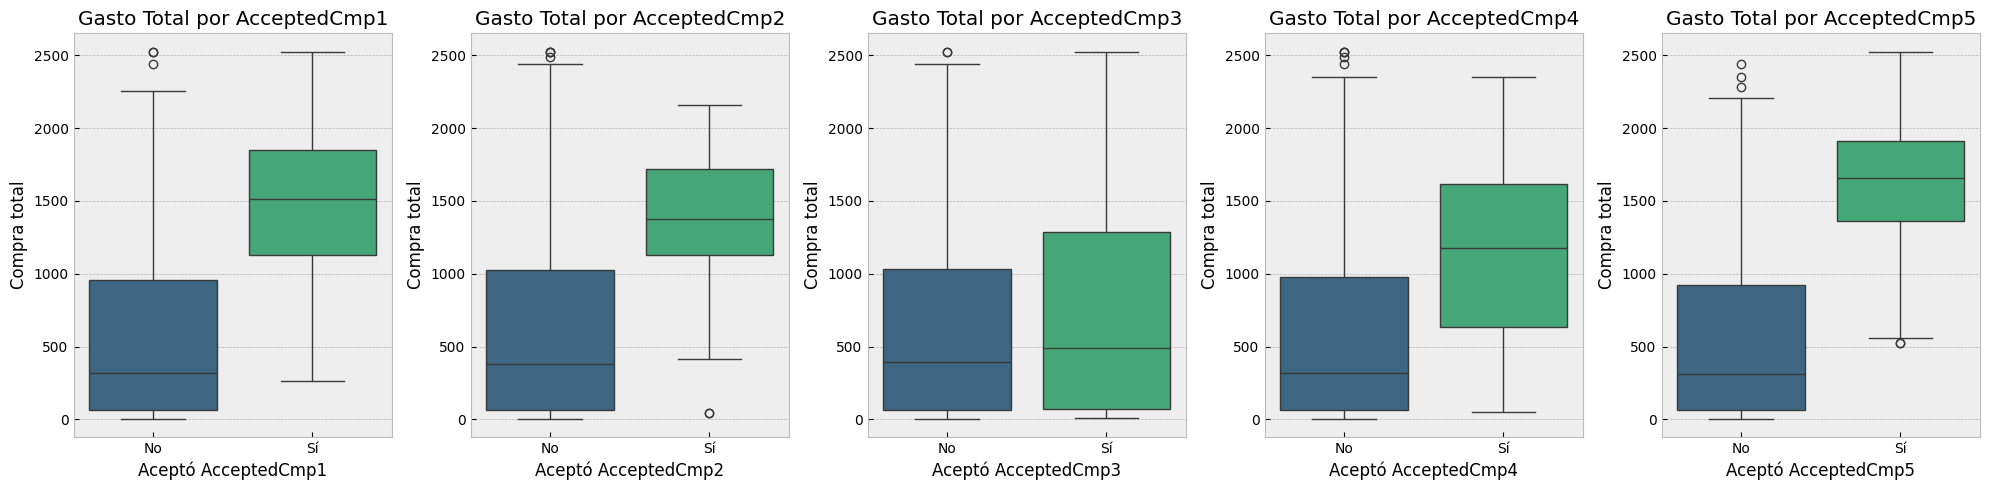

In [ ]:
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for i, campaign in enumerate(campaigns):
    sns.boxplot(data=marketing, x=campaign, y='TotalPurchases', ax=axes[i], palette='viridis')
    axes[i].set_title(f'Gasto Total por {campaign}')
    axes[i].set_xlabel(f'Aceptó {campaign}')
    axes[i].set_ylabel('Compra total')
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['No', 'Sí'])

plt.tight_layout()
plt.show()

Grafico de dispersion - Ingresos vs total de compras segun aceptacion de campañas de marketing

Este gráfico permite ver cómo varía el gasto total por cliente en función del ingreso y la aceptación de campañas de marketing.

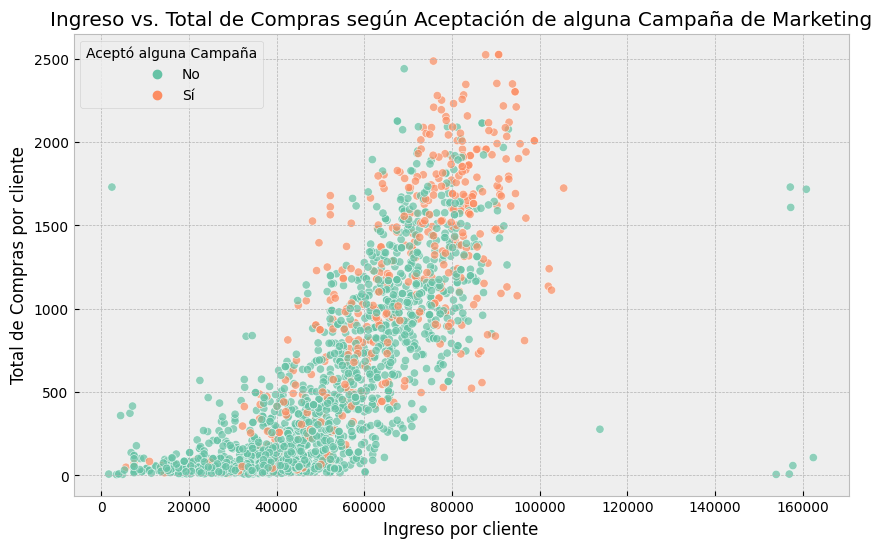

In [ ]:
marketing['AcceptedAnyCmp'] = marketing[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].any(axis=1).astype(int)

colors = sns.color_palette('Set2')[:2]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=marketing, x='Income', y='TotalPurchases', hue='AcceptedAnyCmp', palette=colors, alpha=0.7)
plt.title('Ingreso vs. Total de Compras según Aceptación de alguna Campaña de Marketing')
plt.xlabel('Ingreso por cliente')
plt.ylabel('Total de Compras por cliente')

handles = [plt.Line2D([0,0],[0,0],color=color,marker='o', linestyle='') for color in colors]
plt.legend(handles, ['No', 'Sí'], title='Aceptó alguna Campaña', loc='upper left')

plt.show()


Grafico de lineas - Evolucion de las compras a lo largo de los años

El gráfico muestra la evolución del monto total de compras de los clientes a lo largo de los años y se observa una disminucion en el paso de los años.

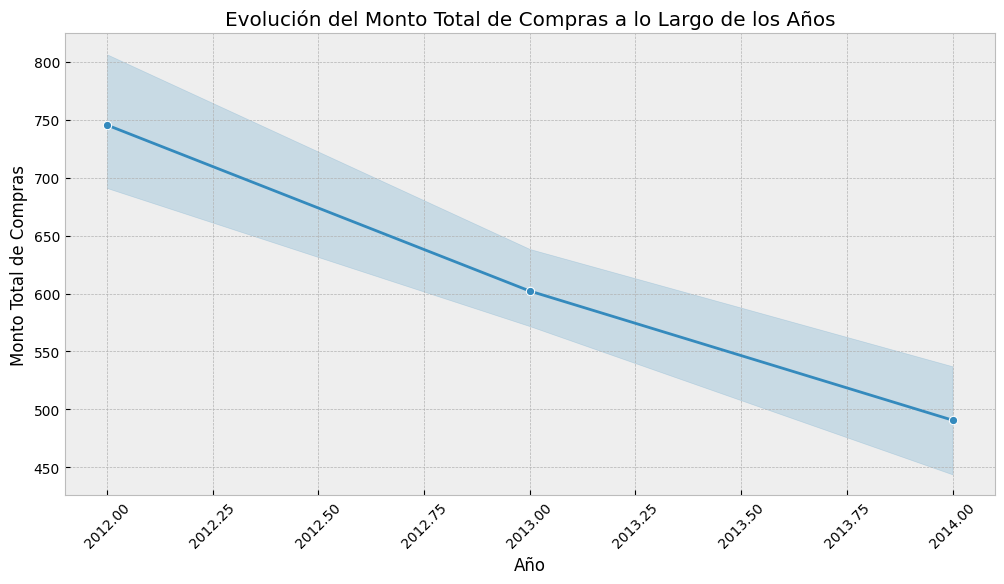

In [ ]:
years_order = sorted(marketing['Year'].unique())
marketing['Year'] = pd.Categorical(marketing['Year'], categories=years_order, ordered=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=marketing, x='Year', y='TotalPurchases', marker='o')
plt.title('Evolución del Monto Total de Compras a lo Largo de los Años')
plt.xlabel('Año')
plt.ylabel('Monto Total de Compras')
plt.xticks(rotation=45)
plt.show()


Coeficiente de Pearson

Se calcula el coeficiente de correlacion entre el total de compras por cliente y cada una de las campañas de marketing.

In [ ]:
correlations = {}
for i in range(1, 6):
    campaign = f'AcceptedCmp{i}'
    correlation = marketing['TotalPurchases'].corr(marketing[campaign])
    correlations[campaign] = correlation


for campaign, correlation in correlations.items():
    print(f"Coeficiente de correlación ({campaign} vs TotalPurchases): {correlation}")

Coeficiente de correlación (AcceptedCmp1 vs TotalPurchases): 0.3814924574611626
Coeficiente de correlación (AcceptedCmp2 vs TotalPurchases): 0.13579100679268968
Coeficiente de correlación (AcceptedCmp3 vs TotalPurchases): 0.05328240778319446
Coeficiente de correlación (AcceptedCmp4 vs TotalPurchases): 0.25322637266219866
Coeficiente de correlación (AcceptedCmp5 vs TotalPurchases): 0.47003926947744235


Grafico de barras - Correlacion de Pearson

El siguiente grafico muestra la relación entre las campañas de marketing y el monto total de compras por clientes, basado en los coeficientes de correlación calculados.

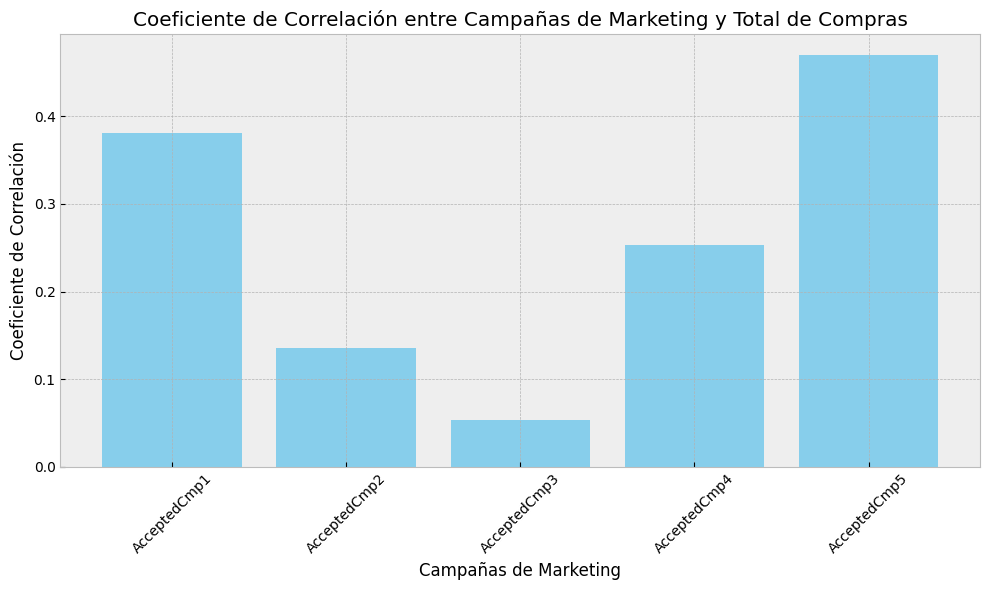

In [ ]:
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
correlations = [0.3814924574611626, 0.13579100679268968, 0.05328240778319446, 0.25322637266219866, 0.47003926947744235]

plt.figure(figsize=(10, 6))
plt.bar(campaigns, correlations, color='skyblue')
plt.xlabel('Campañas de Marketing')
plt.ylabel('Coeficiente de Correlación')
plt.title('Coeficiente de Correlación entre Campañas de Marketing y Total de Compras')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Analisis multivariado**

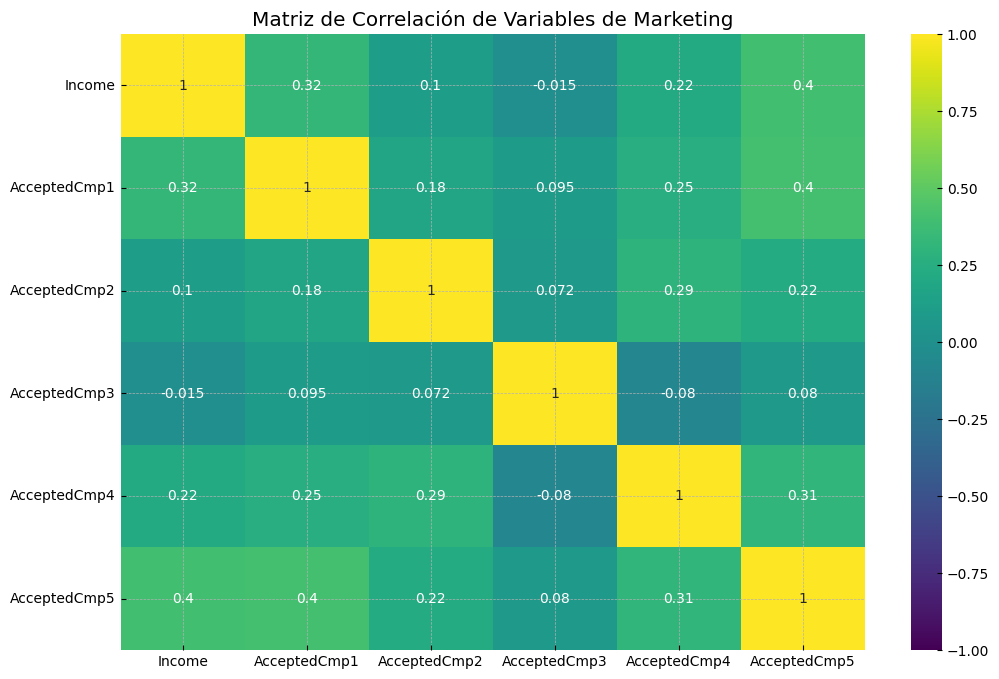

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la figura
plt.figure(figsize=(12, 8))

# Seleccionar las columnas de interés para la matriz de correlación
correlation_matrix = marketing[['Income',
                                'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                                'AcceptedCmp4', 'AcceptedCmp5']].corr()

# Crear el heatmap con la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1)

# Título del gráfico
plt.title('Matriz de Correlación de Variables de Marketing')
plt.show()


#**Preprocesamiento de datos**

**Codificación de variables categóricas**

In [ ]:
#Se utiliza label encoder para evitar la creacion de varias columnas ya que las categorias son variadas
label_encoder = LabelEncoder()

marketing['Education'] = label_encoder.fit_transform(marketing['Education'])
marketing['Marital_Status'] = label_encoder.fit_transform(marketing['Marital_Status'])
marketing.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year,Month,Day,TotalPurchases,AcceptedAnyCmp
0,5524,1957,2,4,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,2012,9,4,1617,0
1,2174,1954,2,4,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,2014,3,8,27,0
2,4141,1965,2,5,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,2013,8,21,776,0
3,6182,1984,2,5,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,2014,2,10,53,0
4,5324,1981,4,3,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,2014,1,19,422,0


#**Feature selection**

**Selección de variable objetivo y variables independientes**

In [ ]:
#Seleccionamos la variable dependiente (Total de ventas por cliente) y las variables independientes (No tenemos en cuenta el Id ni la fecha de inscripcion
#como cliente ya que es un campo fecha y fue dividido en dia, mes y año)
x = marketing.drop(['ID', 'TotalPurchases','Dt_Customer'], axis=1)
y = marketing['TotalPurchases']

In [ ]:
#Variables independientes
x.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Year', 'Month',
       'Day', 'AcceptedAnyCmp'],
      dtype='object')

In [ ]:
#Variable dependiente
#Representacion del total de compras por cada cliente de una muestra aleatorea del dataframe
y.sample(10)

,TotalPurchases
163,1293
35,65
1387,22
418,1474
1843,1042
1610,1538
2002,115
1322,1121
379,51
461,926


#**Modelos**

**Modelo general: Regresion lineal**

In [ ]:
# Defino datos de entrenamiento (70%) y datos de prueba(30%) .
# Random_state:Establece una valor numerico inicial de múmeros aleatorios que asegura que el código sea reproducible cada vez que lo corra.
# shuffle=True: Mezcla el orden de los datos para evitar sesgos.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, shuffle=True)


In [ ]:
#creo el modelo de regresion lineal
modelo = LinearRegression()
# Entreno el modelo
modelo.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = modelo.predict(x_test)

In [ ]:
print('Error cuadrático medio (MSE):', mean_squared_error(y_test, y_pred))
print('Coeficiente de determinación (R^2):', r2_score(y_test, y_pred))

Error cuadrático medio (MSE): 2.7633849081262856e-21
Coeficiente de determinación (R^2): 1.0


El coeficiente de determinacion es 1 indica que el modelo explica el 100% de los datos y al tener un mse demasiado bajo se sugiere continuar con otro modelo para descartar overfitting ya que el modelo con resultados perfectos podria no ser real.

**Modelo de arbol de decision**

In [ ]:
# Entreno el modelo (Arbol de decision)
tree_model = DecisionTreeRegressor()
tree_model.fit(x_train, y_train)

# Realizo prediccion del modelo
y_pred_tree = tree_model.predict(x_test)

# Muestro resultado
print('Regresión por Árboles de Decisión:')
print('Error cuadrático medio (MSE):', mean_squared_error(y_test, y_pred_tree))
print('Coeficiente de determinación (R^2):', r2_score(y_test, y_pred_tree))

Regresión por Árboles de Decisión:
Error cuadrático medio (MSE): 10796.078869047618
Coeficiente de determinación (R^2): 0.9685641530444963


El modelo muestra un coeficiente de determinacion del 96% de los datos lo cual continua siendo un resultado alto, y el mse indica un errores de prediccion altos.

**Modelo: Random Forest o bosque aleatorio**

In [ ]:
# Entreno el modelo Random forest
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

# Realizo prediccion del modelo
y_pred_rf = rf_model.predict(x_test)

# Resultado
print('Regresión por Bosque Aleatorio:')
print('Error cuadrático medio (MSE):', mean_squared_error(y_test, y_pred_rf))
print('Coeficiente de determinación (R^2):', r2_score(y_test, y_pred_rf))


Regresión por Bosque Aleatorio:
Error cuadrático medio (MSE): 4675.592982589286
Coeficiente de determinación (R^2): 0.9863856843572809


El coeficiente de determinacion obtenido explica el 98% de los datos y el mse obtenido contiene un valor aceptable para afirmar que el modelo tiene un muy buen rendimiento con respecto a arbol de decision y regresion lineal.

**Validaciones**

In [ ]:
# Calculo MSE en el conjunto de prueba
mse_test = mean_squared_error(y_test, y_pred)

# Realizp la validación cruzada con 5 particiones
cv_scores = cross_val_score(modelo, x, y, cv=5, scoring='neg_mean_squared_error')

cv_mse = -cv_scores

# Calculo el MSE promedio y la desviación estándar en la validación cruzada
mean_cv_mse = cv_mse.mean()
std_cv_mse = cv_mse.std()

print('Error Cuadrático Medio (MSE) en Test:', mse_test)
print('Error Cuadrático Medio (MSE) en Cross-Validation:', mean_cv_mse)
print('Desviación Estándar de MSE en Cross-Validation:', std_cv_mse)

# Comparo el MSE en Test con el MSE promedio en la validación cruzada
if mse_test > mean_cv_mse + 2*std_cv_mse:
    print("El modelo puede estar sufriendo de sobreajuste.")
elif mse_test < mean_cv_mse - 2*std_cv_mse:
    print("El modelo puede estar infraajustado.")
else:
    print("El modelo tiene un buen ajuste.")


Error Cuadrático Medio (MSE) en Test: 2.7633849081262856e-21
Error Cuadrático Medio (MSE) en Cross-Validation: 4.4897312316765046e-21
Desviación Estándar de MSE en Cross-Validation: 2.4047541393741382e-21
El modelo tiene un buen ajuste.


In [ ]:
# Creo el modelo con 100 arboles de decision
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entreno el modelo
rf_model.fit(x_train, y_train)

rf_pred = rf_model.predict(x_test)
print('MSE en Test (Random Forest):', mean_squared_error(y_test, rf_pred))
print('R² en Test (Random Forest):', r2_score(y_test, rf_pred))

# Validación cruzada con 5 particiones
rf_cv_scores = cross_val_score(rf_model, x, y, cv=5, scoring='neg_mean_squared_error')
rf_cv_mse = -rf_cv_scores
print('MSE en Cross-Validation (Random Forest):', rf_cv_mse.mean())
print('Desviación Estándar de MSE en Cross-Validation (Random Forest):', rf_cv_mse.std())


MSE en Test (Random Forest): 4600.148615624999
R² en Test (Random Forest): 0.9866053620386235
MSE en Cross-Validation (Random Forest): 3787.3726888443794
Desviación Estándar de MSE en Cross-Validation (Random Forest): 584.8039003716794


**Valores reales vs valores predichos**

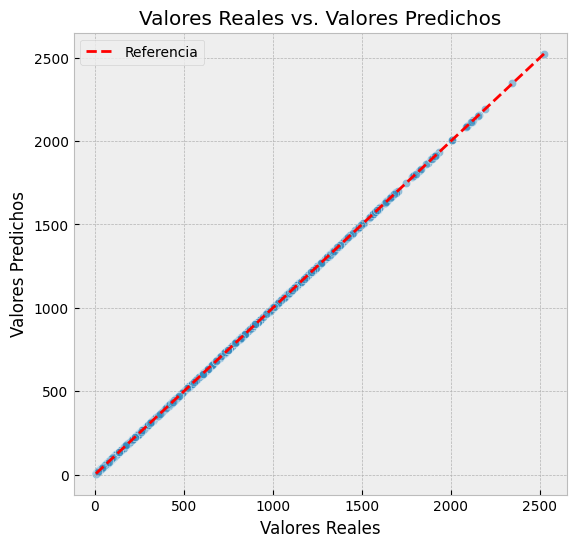

In [ ]:
# Gráfico de dispersión de valores reales vs. valores predichos - Regresión Lineal
plt.figure(figsize=(14, 6))

# Comparación de valores reales vs. valores predichos
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Referencia')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Valores Predichos')
plt.legend()


La linea punteada roja muestra la linea de referencia donde los valores donde los valores predichos serian exacatamente iguales a los valores reales.

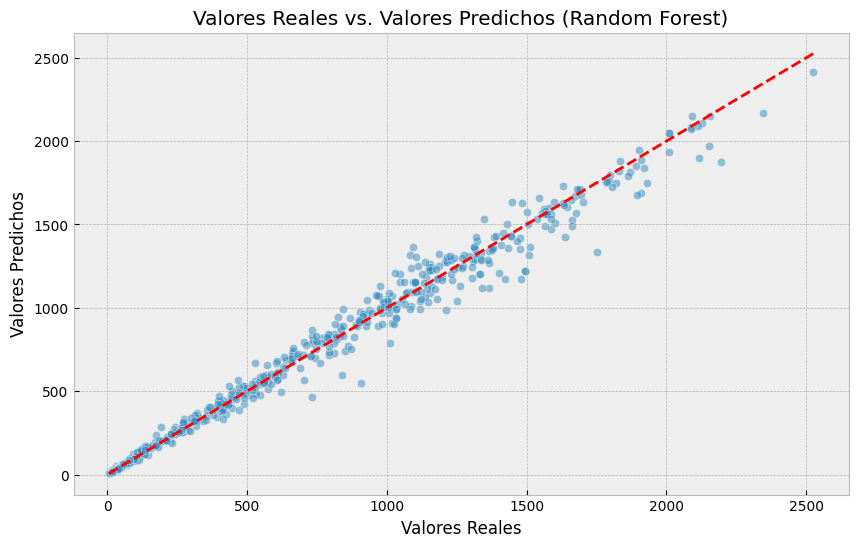

In [ ]:
# Gráfico de dispersión de valores reales versus valores predichos - Random Forest
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=rf_pred, alpha=0.5)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Valores Predichos (Random Forest)')
plt.show()


#**Conclusion**

Se evaluó un modelo de regresión utilizando regresion lineal, decision tree y random forest. El análisis mostró que el mejor modelo fue Random Forest, el cual tuvo un rendimiento excelente en el conjunto de prueba con un bajo MSE y un alto coeficiente de determinacion lo que indica una alta precisión en las predicciones.

Estos datos indican que las campañas de marketing si influyen en la decision de compra de los clientes, con lo cual la hipotesis planteada es correcta.